# The Sparks Foundation - Data Science and Business Analytics Internship

Name - Sarang Narayanrao Chandekar

Link - https://internship.thesparksfoundation.info/

Task No.4 - Exploratory Data-Analysis -Terrorism (Level-Intermediate)

**Problem Statement - As a security/defense analyst, try to find out hot zones of terrorism.**

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Importing the Dataset**

In [2]:
df = pd.read_csv("C:/Users/ASUS/Desktop/SPARK/Exploratory Data Analysis/Exploratory Data Analysis -Terrorism/globalterrorismdb_0718dist.csv", encoding = 'latin 1')

In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


**We will rename the columns to make data more understandable**

In [4]:
df.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country',
                   'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'},inplace=True)
df.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


**We will create a New dataframe named df1 which will consist features which we will be using for the analysis.**

In [5]:
df1= df[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude',
            'AttackType','Killed','Wounded','Target','Group','Target_type','Weapon_type']]

In [6]:
df1.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [7]:
df1.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [8]:
# We will Replace a feature to make it easy to notice
df1.replace( {"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)": "Vehicle"},inplace = True)

In [9]:
df1.shape

(181691, 16)

In [10]:
df1.columns.unique()

Index(['Year', 'Month', 'Day', 'Country', 'State', 'Region', 'City',
       'Latitude', 'Longitude', 'AttackType', 'Killed', 'Wounded', 'Target',
       'Group', 'Target_type', 'Weapon_type'],
      dtype='object')

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage: 22.2+ MB


## Visualizaiton 

<AxesSubplot:title={'center':'Attacks Across The Years'}, xlabel='Year', ylabel='count'>

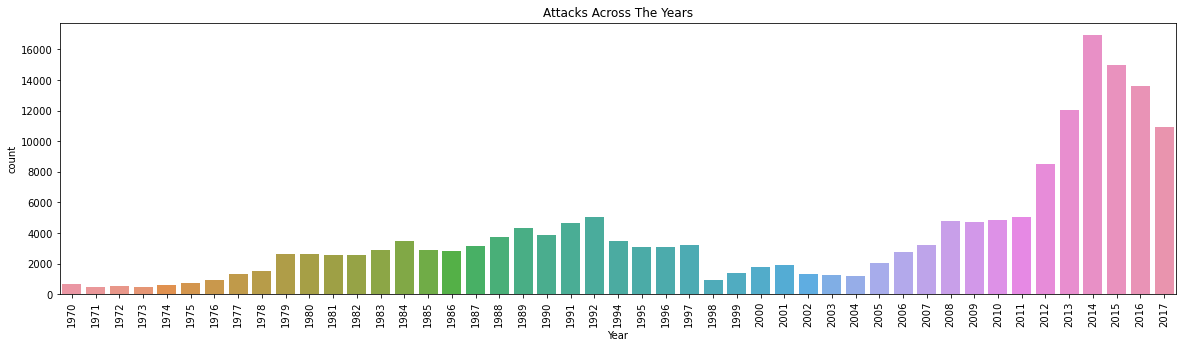

In [12]:
plt.figure(figsize=(20,5))
plt.xticks(rotation = 90)
plt.title('Attacks Across The Years')
sns.countplot(x=df1.Year)

**Over the years the rate of terrorism has increased, on 2014 world noticed highest number/frequency of terrorist attacks. After 2014 the rate of terrorism seems to be reduced.**

In [26]:
a = df1['Country'].value_counts().head(25)
print(a)

Iraq                        24636
Pakistan                    14368
Afghanistan                 12731
India                       11960
Colombia                     8306
Philippines                  6908
Peru                         6096
El Salvador                  5320
United Kingdom               5235
Turkey                       4292
Somalia                      4142
Nigeria                      3907
Thailand                     3849
Yemen                        3347
Spain                        3249
Sri Lanka                    3022
United States                2836
Algeria                      2743
France                       2693
Egypt                        2479
Lebanon                      2478
Chile                        2365
Libya                        2249
West Bank and Gaza Strip     2227
Syria                        2201
Name: Country, dtype: int64


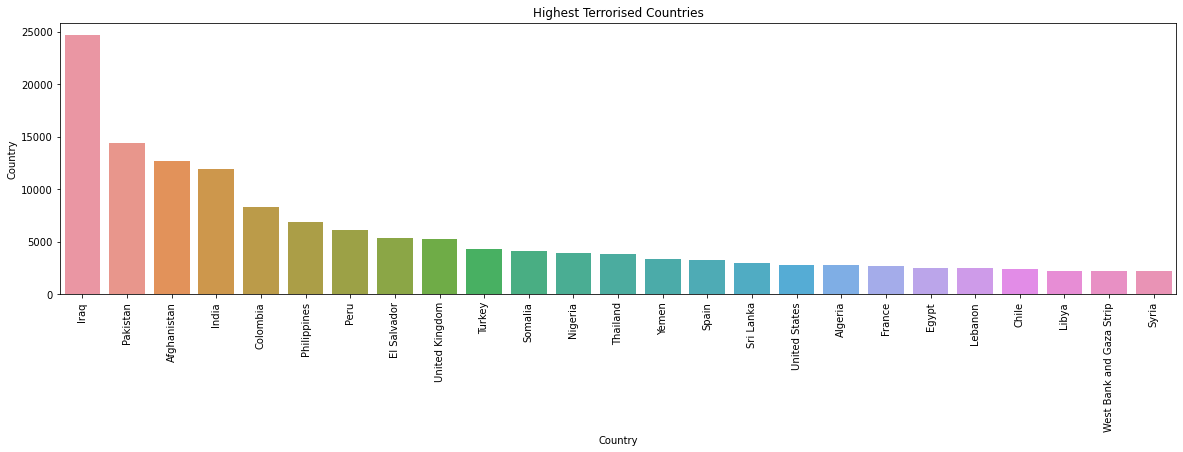

In [28]:
plt.figure(figsize = (20,5))
sns.barplot(a[:25].index,a[:25])
plt.title('Highest Terrorised Countries')
plt.xlabel('Country')
plt.xticks(rotation= 90)
plt.show()

Above plot shows the ten highest terrorised countries, **Iraq** being at the top and **India** at 4th rank.

In [15]:
b = df1['Region'].value_counts().head(10)
print(b)

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64


<AxesSubplot:title={'center':'Attacks by Region'}, xlabel='Region', ylabel='count'>

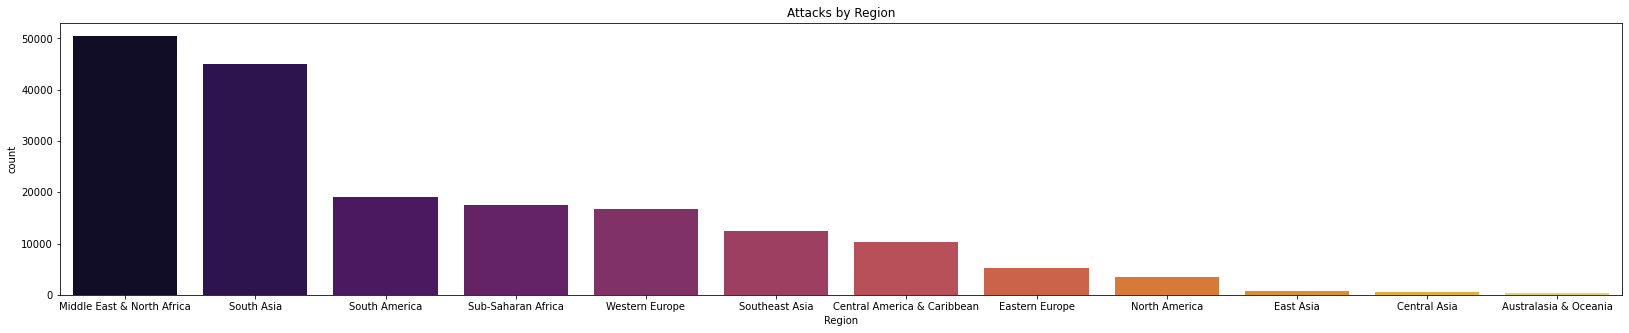

In [16]:
plt.figure(figsize=(28,5))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation = 0)
plt.title('Attacks by Region')
sns.countplot(x=df1.Region,palette='inferno',order = df1['Region'].value_counts().index)

**Middle East & North Africa** is highly terrorised region, **Australaisa & Oceania** being the lowest.

In [30]:
c = df1['State'].value_counts().head(25)
print(c)

Baghdad                                7645
Northern Ireland                       4498
Unknown                                4290
Balochistan                            3710
Saladin                                3411
Al Anbar                               3299
Nineveh                                3241
Sindh                                  3206
Khyber Pakhtunkhwa                     3084
Diyala                                 3041
Lima                                   2615
Jammu and Kashmir                      2454
Federally Administered Tribal Areas    2392
San Salvador                           1923
Antioquia                              1891
Punjab                                 1778
Kirkuk                                 1669
Santiago Metropolitan                  1639
Banaadir                               1613
West Bank                              1584
Basque Country                         1446
Borno                                  1423
Corsica                         

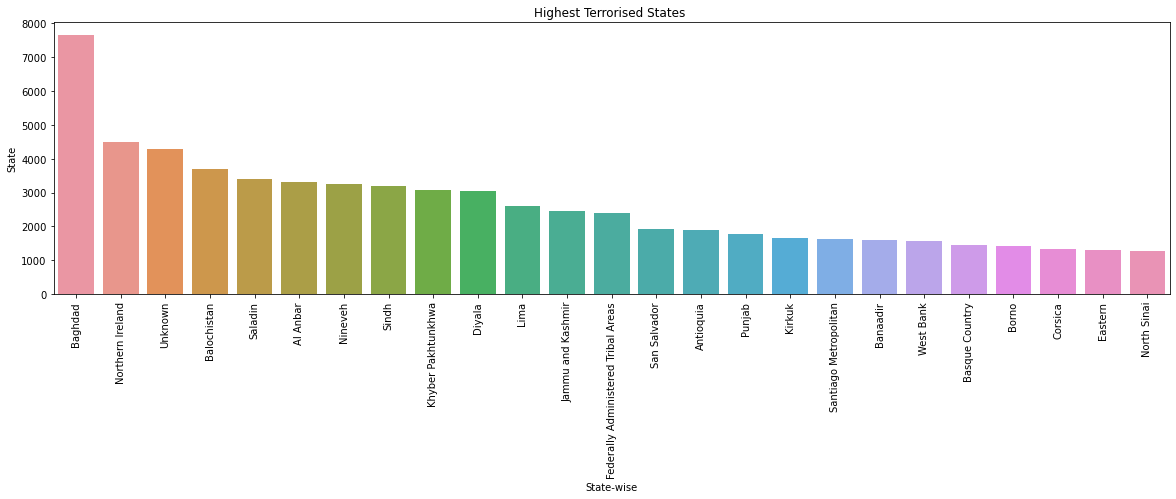

In [32]:
plt.figure(figsize=(20,5))
sns.barplot(c[:25].index,c[:25])
plt.title('Highest Terrorised States ')
plt.xlabel('State-wise')
plt.xticks(rotation = 90)
plt.show()

In [19]:
e = df1['AttackType'].value_counts().head(10)
print(e)

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64


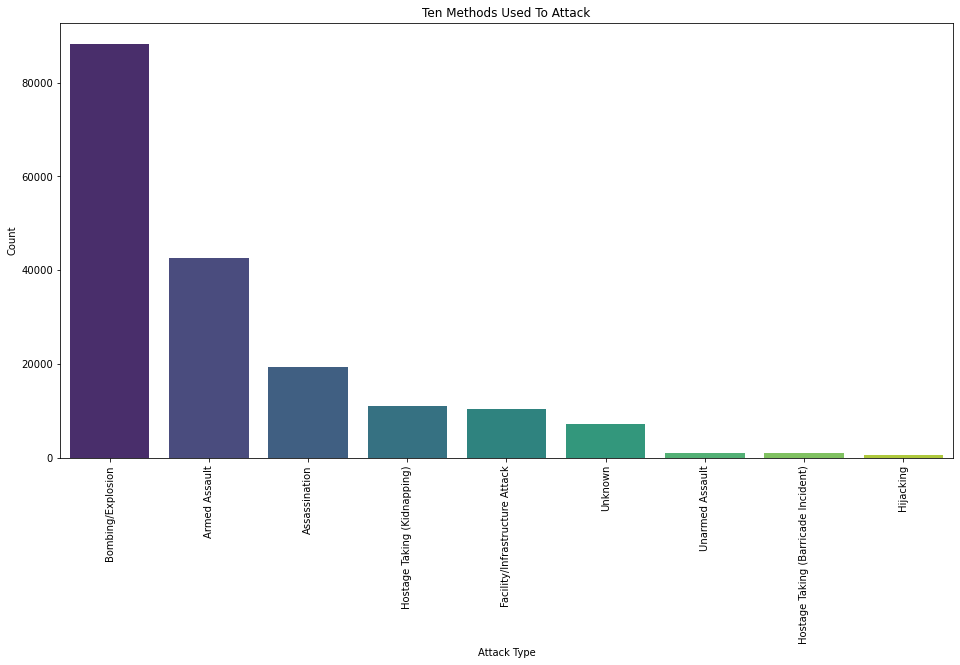

In [49]:
plt.figure(figsize = (16,8))
sns.barplot(e[:10].index,e[:10],palette = 'viridis')
plt.title('Ten Methods Used To Attack')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

Over the years terrorists have used **Bombing/ Explosion** the most as the means to spread terrorism, causing casualties & damage property.

In [21]:
f = df1['Target_type'].value_counts().head(10)
print(f)

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Name: Target_type, dtype: int64


<AxesSubplot:title={'center':'Attacks based on Target type'}, xlabel='Target_type', ylabel='count'>

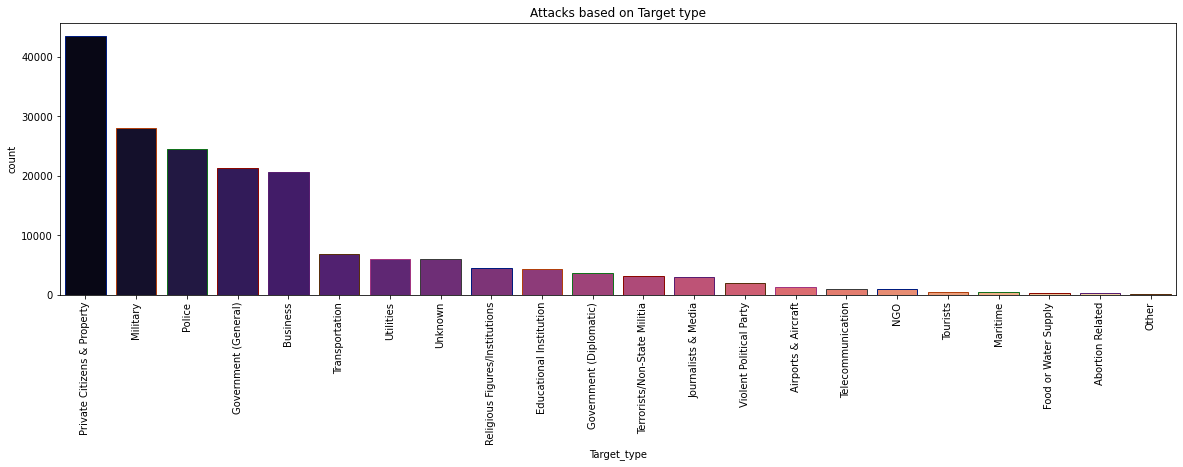

In [39]:
plt.figure(figsize=(20,5))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation = 90)
plt.title('Attacks based on Target type')
sns.countplot(x=df1.Target_type,order = df1['Target_type'].value_counts().index,palette = 'magma',edgecolor = sns.color_palette('dark',8))

**Citizens and Public properties** are the most common target as it's easy to harm them

In [23]:
h = df1['Weapon_type'].value_counts()
print(h)

Explosives            92426
Firearms              58524
Unknown               15157
Incendiary            11135
Melee                  3655
Chemical                321
Sabotage Equipment      141
Vehicle                 136
Other                   114
Biological               35
Fake Weapons             33
Radiological             14
Name: Weapon_type, dtype: int64


<AxesSubplot:title={'center':'Weapons Used by Terrorists'}, xlabel='Weapon_type', ylabel='count'>

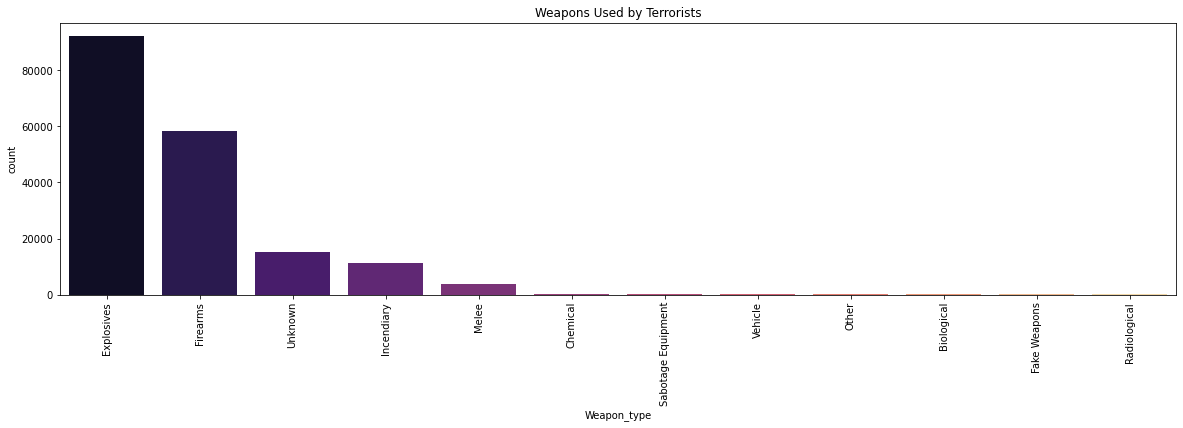

In [48]:
plt.figure(figsize=(20,5))
plt.rcParams.update({'font.size':10})
plt.xticks(rotation = 90)
plt.title('Weapons Used by Terrorists')
sns.countplot(x=df1.Weapon_type,order = df1.Weapon_type.value_counts().index,palette = "magma")

**Explosives** are the most preferred weapon used to terrorise countries, **firearms** being second.

### Observation & Recommendations:

**Hot-Zones**
1. Region-wise Middle-East and North Africa is the hot zone for terrorist attacks.
2. Iraq, Pakistan, Afganisthan and India are the countries mostly impacted by terrorisms.
3. Civilians and Public Properties being damaged or targetted by terrorist the most.

**Security Issues & Insights**
1. Security personals and armed forces of respective countries should increase the security during the festivals and important national events.
2. During the National Events and Festivals, special mesasures should be taken to protect civilians so that we can decrease the number of casualties.
3. Use of new technologies to detect explosives and fire-arms can reduce the chances of enemy infiltrating in the events.
4. Thorough inspection of the security personals can also help reducing the chances of infiltration.